In [63]:
import pickle
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels as statsmodels
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from statsmodels.graphics import tsaplots
#from uszipcode import ZipcodeSearchEngine
import statsmodels.api as sm
import pylab
import statsmodels.api as sm

In [7]:
# import dataframe containing column on properties over fair market rent
over_fmr = pd.read_csv("over_fmr_dataframe.csv")

## Test of Normality of Distribution of Listings With Bedroom Attribute of 1

Null Hypothesis: The sample of listings labeled as one bedroom comes from a normal distribution

Alternative Hypothesis: The sample of listings labeled as one bedroom does not come from a normal distribution

Alpha = .05

In [6]:
# import dataframe containing column on properties over fair market rent
over_fmr = pd.read_csv("over_fmr_dataframe.csv")
# subset beds that were assigned one to take a closer look
one_bed = over_fmr.loc[over_fmr['beds_baths'] == "1"]
x = (one_bed[['price']])
# run test of normality 
k2, p = stats.normaltest(x)
("P-value {}".format(p))

'P-value [1.19958732e-47]'

A test of normality for the sample of craigslist listings advertised as 1 bedroom at the .05 level of significance suggests to accept the alternative hypothesis, that the distribution is not normal.

## Two Sample Proportions Z-test To Test Whether St. Paul Is More Affordable Than Minneapolis

Alpha = .05

Null Hypothesis: There is not a difference between the proportion of craigslist rentals in Minneapolis one standard deviaton over FMR and the proportion of craigslist rentals in St. Paul one standard deviation over FMR

Alternative Hypothesis: The proportion of craigslist rentals in Minneapolis one standard deviaton over FMR is greater than the proportion of craigslist rentals in St. Paul one standard deviation over FMR

In [8]:
# subset st paul and minneapolis ads that are one standard deviation over the fair market rent
st_paul_over_fmr = over_fmr.loc[(over_fmr['City'] == "SAINT PAUL") & (over_fmr['over fmr1'] == 1)]
minneapolis_over_fmr = over_fmr.loc[(over_fmr["City"] == "MINNEAPOLIS") & (over_fmr['over fmr1'] == 1)]

In [9]:
# subset total listings within St Paul and Minneapolis
st_paul_sample = len(over_fmr.loc[over_fmr['City'] == "SAINT PAUL"])
minneapolis_sample = len(over_fmr.loc[over_fmr['City'] == "MINNEAPOLIS"])

In [10]:
# get total amount of listings in St. Paul and Minneapolis over fmr
st_paul_true = len(st_paul_over_fmr)
minneapolis_true = len(minneapolis_over_fmr)
print (st_paul_sample, minneapolis_sample, st_paul_true, minneapolis_true)

2305 7165 1213 4219


In [11]:
# create numpy array of rentals one standard deviation over fair market rent for respective cities
count = np.array([int(minneapolis_true), int(st_paul_true)])
# create a numpy array of total number of rentals in saint paul and minneapolis
nobs = np.array([int(minneapolis_sample), int(st_paul_sample)])
# run proportions z test assuming null hypothesis is true, hence "larger" as argument for alternative
# that minneapolis has a greater proportion of over fair market rent 
z, p = proportions_ztest(count, nobs, alternative = 'larger' )
print ("p value = ", p)

p value =  6.286530431543305e-08


The p-value is below the alpha level of .05, so the alternative hypothesis - that the proportion of craigslist rentals in Minneapolis one standard deviaton over FMR is greater than the proportion of craigslist rentals in St. Paul one standard deviation over FMR - is accepted.

## Two Sample T-test of Means to Test If There Is A Difference in Affordability Between Zipodes Below And Above Median Wealth Rating

Alpha = .05

Null Hypothesis: There is no difference between the means of the proportion of craigslist listings per Zipcode Above Median Wealth and the proportion of craigslist listings per Zipcode below Median Wealth

Alternative Hypothesis: There is a significant difference between the means of the proportion of craigslist listings per Zipcode Above Median Wealth and the proportion of craigslist listings per Zipcode below Median Wealth

In [12]:
# read in the munged data
munged = pd.read_csv('craigslist_munged1.csv')
munged
# subset munged data into above median income and under median income
above_med = munged.loc[munged['above median'] == True]
under_med = munged.loc[munged['above median'] == False]

In [13]:
# calculat mean and standard deviation for craigslist pct over fmr field
# for each subset
above_med_std = np.std(above_med['craigslist pct over fmr'])
under_med_std = np.std(under_med['craigslist pct over fmr'])
above_med_mu = np.std(above_med['craigslist pct over fmr'])
under_med_mu = np.std(under_med['craigslist pct over fmr'])


In [14]:
# run two sample means t-test 
t, p = stats.ttest_ind(above_med['craigslist pct over fmr'], under_med['craigslist pct over fmr'])
("P- value: {}".format(p))

'P- value: 0.9637875821219561'

## Whitney Test With the Same Data and Same Null and Alternative Hypotheses

In [15]:
s, p = stats.mannwhitneyu(above_med['craigslist pct over fmr'], under_med['craigslist pct over fmr'], alternative = "two-sided")
("P- value: {}".format(p))

'P- value: 0.4017213139924529'

## Two Sample Z-test to Analyze Affordability Between St. Paul/Minneapolis and Their Surrounding Suburbs

Alpha = .05

Null Hypothesis: There is not a difference between the proportion of craigslist rentals over the fair market rent in the Suburban Cities of Minneapolis/St. Paul vs Minneapolis/St. Paul themselves.

Alternative Hypothesis: There is a significant difference between the proportion of craigslist rentals over the fair market rent in the Suburban Cities of Minneapolis/St. Paul vs Minneapolis/St. Paul themselves.


In [ ]:
# read in dataframe containing rental data
final_cities = pd.read_csv('over_fmr_dataframe.csv')

In [33]:
cities = final_cities.loc[(final_cities['City'] == "SAINT PAUL") | (final_cities['City'] == "MINNEAPOLIS")]
suburbs = final_cities.loc[(final_cities['City'] != "SAINT PAUL") & (final_cities['City'] != "MINNEAPOLIS")]

In [37]:
# write function to run t-test difference of means
# on both datasets
# run two sample means t-test 
def city_vs_suburb(suburbs_df, city_df):
    suburbs_total = len(suburbs_df)
    city_total = len(city_df)
    suburbs_overfmr = len(suburbs_df.loc[suburbs_df['over fmr1'] == 1])
    city_overfmr = len(city_df.loc[city_df['over fmr1'] == 1])
    # create numpy array of rentals one standard deviation over fair market rent for respective cities
    count = np.array([int(city_overfmr), int(suburbs_overfmr)])
    # create a numpy array of total number of rentals in saint paul and minneapolis
    nobs = np.array([int(city_total), int(suburbs_total)])
    # run proportions z test assuming null hypothesis is true, hence "larger" as argument for alternative
    # that minneapolis has a greater proportion of over fair market rent 
    z, p = proportions_ztest(count, nobs, alternative = 'larger' )
    return ("p value = {} ".format(p))


In [38]:
city_vs_suburb(suburbs, cities)

'p value = 2.4313664791865632e-141 '

The p-value is below the alpha level of .05, so the alternative hypothesis - that the proportion of craigslist rentals in the cities of Minneapolis and St .Paul one standard deviaton over FMR is greater than that of the proportion of rentals one standard deviation over the fmr in the suburbs - is accepted. 

## Pearson Correlation Coefficient Between Price and Square Feet

Alpha Level = .05

Null Hypothesis: There is no significant relationship between the square feet and price variables

Alternative Hypothesis: There is a statistically significant relationship between the square feet and price variables

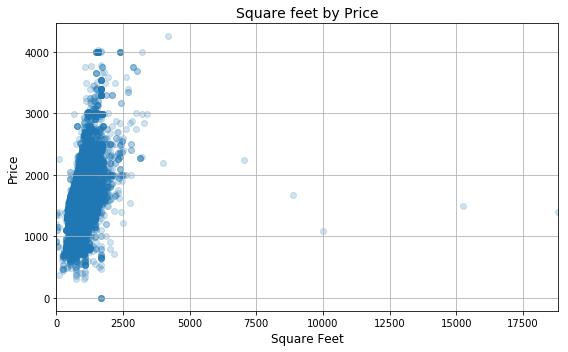

In [23]:
# generate a scatterplot for price vs square feet 
# and create lists as inputs
x = [a for a in over_fmr['square feet']]
y = list(over_fmr['price'])
# generate plot object
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
# set plot configurations
ax.set_xlim([0, max(x)])
ax.set_xlabel('Square Feet', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Square feet by Price', fontsize=14)
# set plot layout
ax.grid(True)
fig.tight_layout()
plt.show()

In [30]:
# run pearson r to obtain correlation coefficient between square ft and price
print ("dataset with square feet values that were filled with the mean = length ", len(over_fmr))
stats.pearsonr(over_fmr['price'], over_fmr['square feet'])

dataset with square feet values that were filled with the mean = length  17111


(0.47122639914774045, 0.0)

As is indicated by the results Pearson Correlation Coefficient between Price and Square feet, at the .05 level of significance we can accept the alternative hypothesis that there is a relationship between the Price and Square Feet variables such that 47% of the variance of the Price residuals can be explained by the variance of the residuals of the Square Feet residuals

## Autocorrelation and Partial Autocorrelation to Investigate Relationship Between Price And Time

In [72]:
# subset price and datetime
time_df = over_fmr[['datetime', 'price']]
# set datetime as index
time_df = time_df.set_index(['datetime'])
# create datetime object
time_df.index = pd.to_datetime(time_df.index)

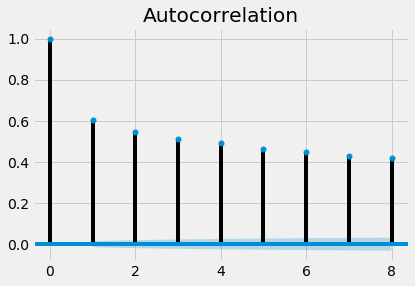

In [66]:
# use fivethirtyeight plot style
plt.style.use('fivethirtyeight')
# Display the autocorrelation of price over time
fig = tsaplots.plot_acf(time_df, lags=8)
# Show plot
plt.show()

The autocorrelation plot with 8 lag windows to represent approximately 2-week periods in the dataset shows a statistically significant correlation between time and price variables for all 8 lags. The highest correlation coefficient around 60%, and the lowest slightly above 40%. 

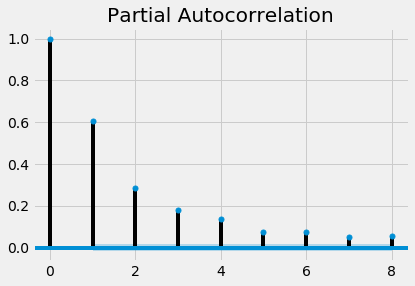

In [89]:
# Display partial autocorrelation of price over time
fig = tsaplots.plot_pacf(time_df, lags=8)
# Show plot
plt.show()

The partial autocorrelation plot with 8 lag windows to represent approximately 2-week periods in the dataset also shows a statistically significant correlation between time and price variables for all 8 lags. However, a partial autocorrelation may be better representative of the true correlation betweeen price and time variables, as it removes any variables besides price and time alone that may contribute to the correlation co-efficient.